In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [4]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [5]:
path= r'C:\Users\solom\Downloads\Machine Learning- Project'

In [6]:
df_weather = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Weather_updated.csv'))
df_weather

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_pressure,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,1.0304,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,0.98,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,6,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2,1.0292,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,0.62,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5

In [7]:
df_pleasant = pd.read_csv(os.path.join(path, 'Manipulated Data', 'Pleasant_updated.csv'), index_col = False)
df_pleasant

,Unnamed: 0,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Pre-processing

In [9]:
# Remove unnamed column
df_weather = df_weather.drop(columns=['Unnamed: 0'])

In [10]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_pressure,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,1.0304,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,0.98,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,6,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,1.0292,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,0.62,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30

In [11]:
df_weather.shape

(22950, 137)

In [12]:
# Remove unnamed column
df_pleasant = df_pleasant.drop(columns=['Unnamed: 0'])

In [13]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_pleasant.shape

(22950, 16)

### For 2010s dataset

In [16]:
# Filter weather dataset to 2010s
df_2010s = df_weather[df_weather['DATE'].astype(str).str.startswith('201')] 
df_2010s.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_pressure,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,8,5.0,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,1.0054,7,0.91,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,0.76,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,8,3.0,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,1.0250,6,0.86,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,0.74,7,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

In [17]:
# Check shape
df_2010s.shape

(3652, 137)

In [18]:
# Filter pleasant dataset to 2010s
pleasant_2010s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('201')] 
pleasant_2010s.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Check shape
pleasant_2010s.shape

(3652, 16)

In [20]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_2010s = df_2010s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_2010s.shape

(3652, 135)

In [21]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_2010s = pleasant_2010s.drop(columns=['DATE'])

# Check shape
pleasant_2010s.shape

(3652, 15)

In [22]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2010s.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [23]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [24]:
# Check shape
y_1.shape

(3652,)

In [25]:
# Create X matrix
X_1 = df_2010s.to_numpy()

In [26]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


In [27]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

### Madrid

In [29]:
# Filter weather dataset to only include Madrid
df_mad = df_weather[df_weather.columns[df_weather.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_mad.head()

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.0,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.0,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.0,7.8,12.1,8.2,16.0


In [30]:
# Filter pleasant dataset to only include Madrid
mad_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head()

,MADRID_pleasant_weather
0,0
1,0
2,0
3,0
4,0


In [31]:
# Check shape
print(df_mad.shape)
print(mad_pleasant.shape)

(22950, 9)
(22950, 1)


In [32]:
# Create matrices
y_2 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (22950,)


In [33]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

# Check shape
print(y_2.shape)

(22950,)


In [34]:
# Create X matrix
X_2 = df_mad.to_numpy()

# Check shapes of the matrices
print(X_2.shape)
print(y_2.shape)

(22950, 9)
(22950,)


In [35]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Optimizing Hyperparameters for random forest

#### 2010s data

In [38]:
# Create random forest classifier

clf_1a = RandomForestClassifier()

In [39]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_1 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [40]:
# Perform hyperparameter tuning using GridSearchCV

start_1a = time.time()
grid_1a = GridSearchCV(clf_1a,param_grid=grid_space_1,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_1a = grid_1a.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 1.7313329418500265 minutes


In [41]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_1a.best_params_))
print('Best GRID search score is: '+str(model_grid_1a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.968236582694414


#### Random Search

In [43]:
# Create random forest classifier

clf_1b = RandomForestClassifier()

In [44]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_1 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [45]:
# Perform hyperparameter tuning using RandomizedSearchCV

start_1b = time.time()
rf_random_1b = RandomizedSearchCV(clf_1b, rs_space_1, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_1b = rf_random_1b.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.026761027177175 minutes


In [46]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_1b.best_params_))
print('Best RANDOM search score is: '+str(model_random_1b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 160}
Best RANDOM search score is: 0.9656809054399416


In [47]:
# Create a random forest classifier using the best results from the searches

clf_1c = RandomForestClassifier(
    n_estimators = 100, 
    max_depth=None, 
    max_features=15, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [48]:
# Train the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1c.fit(X_train_1, y_train_1)

RandomForestClassifier(max_features=15, min_samples_leaf=2)

In [49]:
# Perform predictions on the test dataset
y_pred_1 = clf_1c.predict(X_test_1)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9813800657174151


#### Madrid

##### Grid Search

In [52]:
# Create random forest classifier

clf_2a = RandomForestClassifier()

In [53]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_2 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [54]:
# Perform hyperparameter tuning using GridSearchCV

start_2a = time.time()
grid_2a = GridSearchCV(clf_2a,param_grid=grid_space_2,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_2a = grid_2a.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 3.0540273149808246 minutes


In [55]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_2a.best_params_))
print('Best GRID search score is: '+str(model_grid_2a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


#### Random Search

In [57]:
# Create random forest classifier

clf_2b = RandomForestClassifier()

In [58]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_2 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [59]:
# Perform hyperparameter tuning using RandomizedSearchCV

start_2b = time.time()
rf_random_2b = RandomizedSearchCV(clf_2b, rs_space_2, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_2b = rf_random_2b.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start_2b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.7930588682492574 minutes


In [60]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_2b.best_params_))
print('Best RANDOM search score is: '+str(model_random_2b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [61]:
# Create a random forest classifier using the best results from the searches

clf_2c = RandomForestClassifier(
    n_estimators=10, 
    max_depth=3, 
    max_features=7, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [62]:
# Train the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2c.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=10)

In [63]:
# Perform predictions on the test dataset
y_pred_2 = clf_2c.predict(X_test_2)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  1.0


### Feature importance and Evaluation

#### 2010s data

##### Random Forest

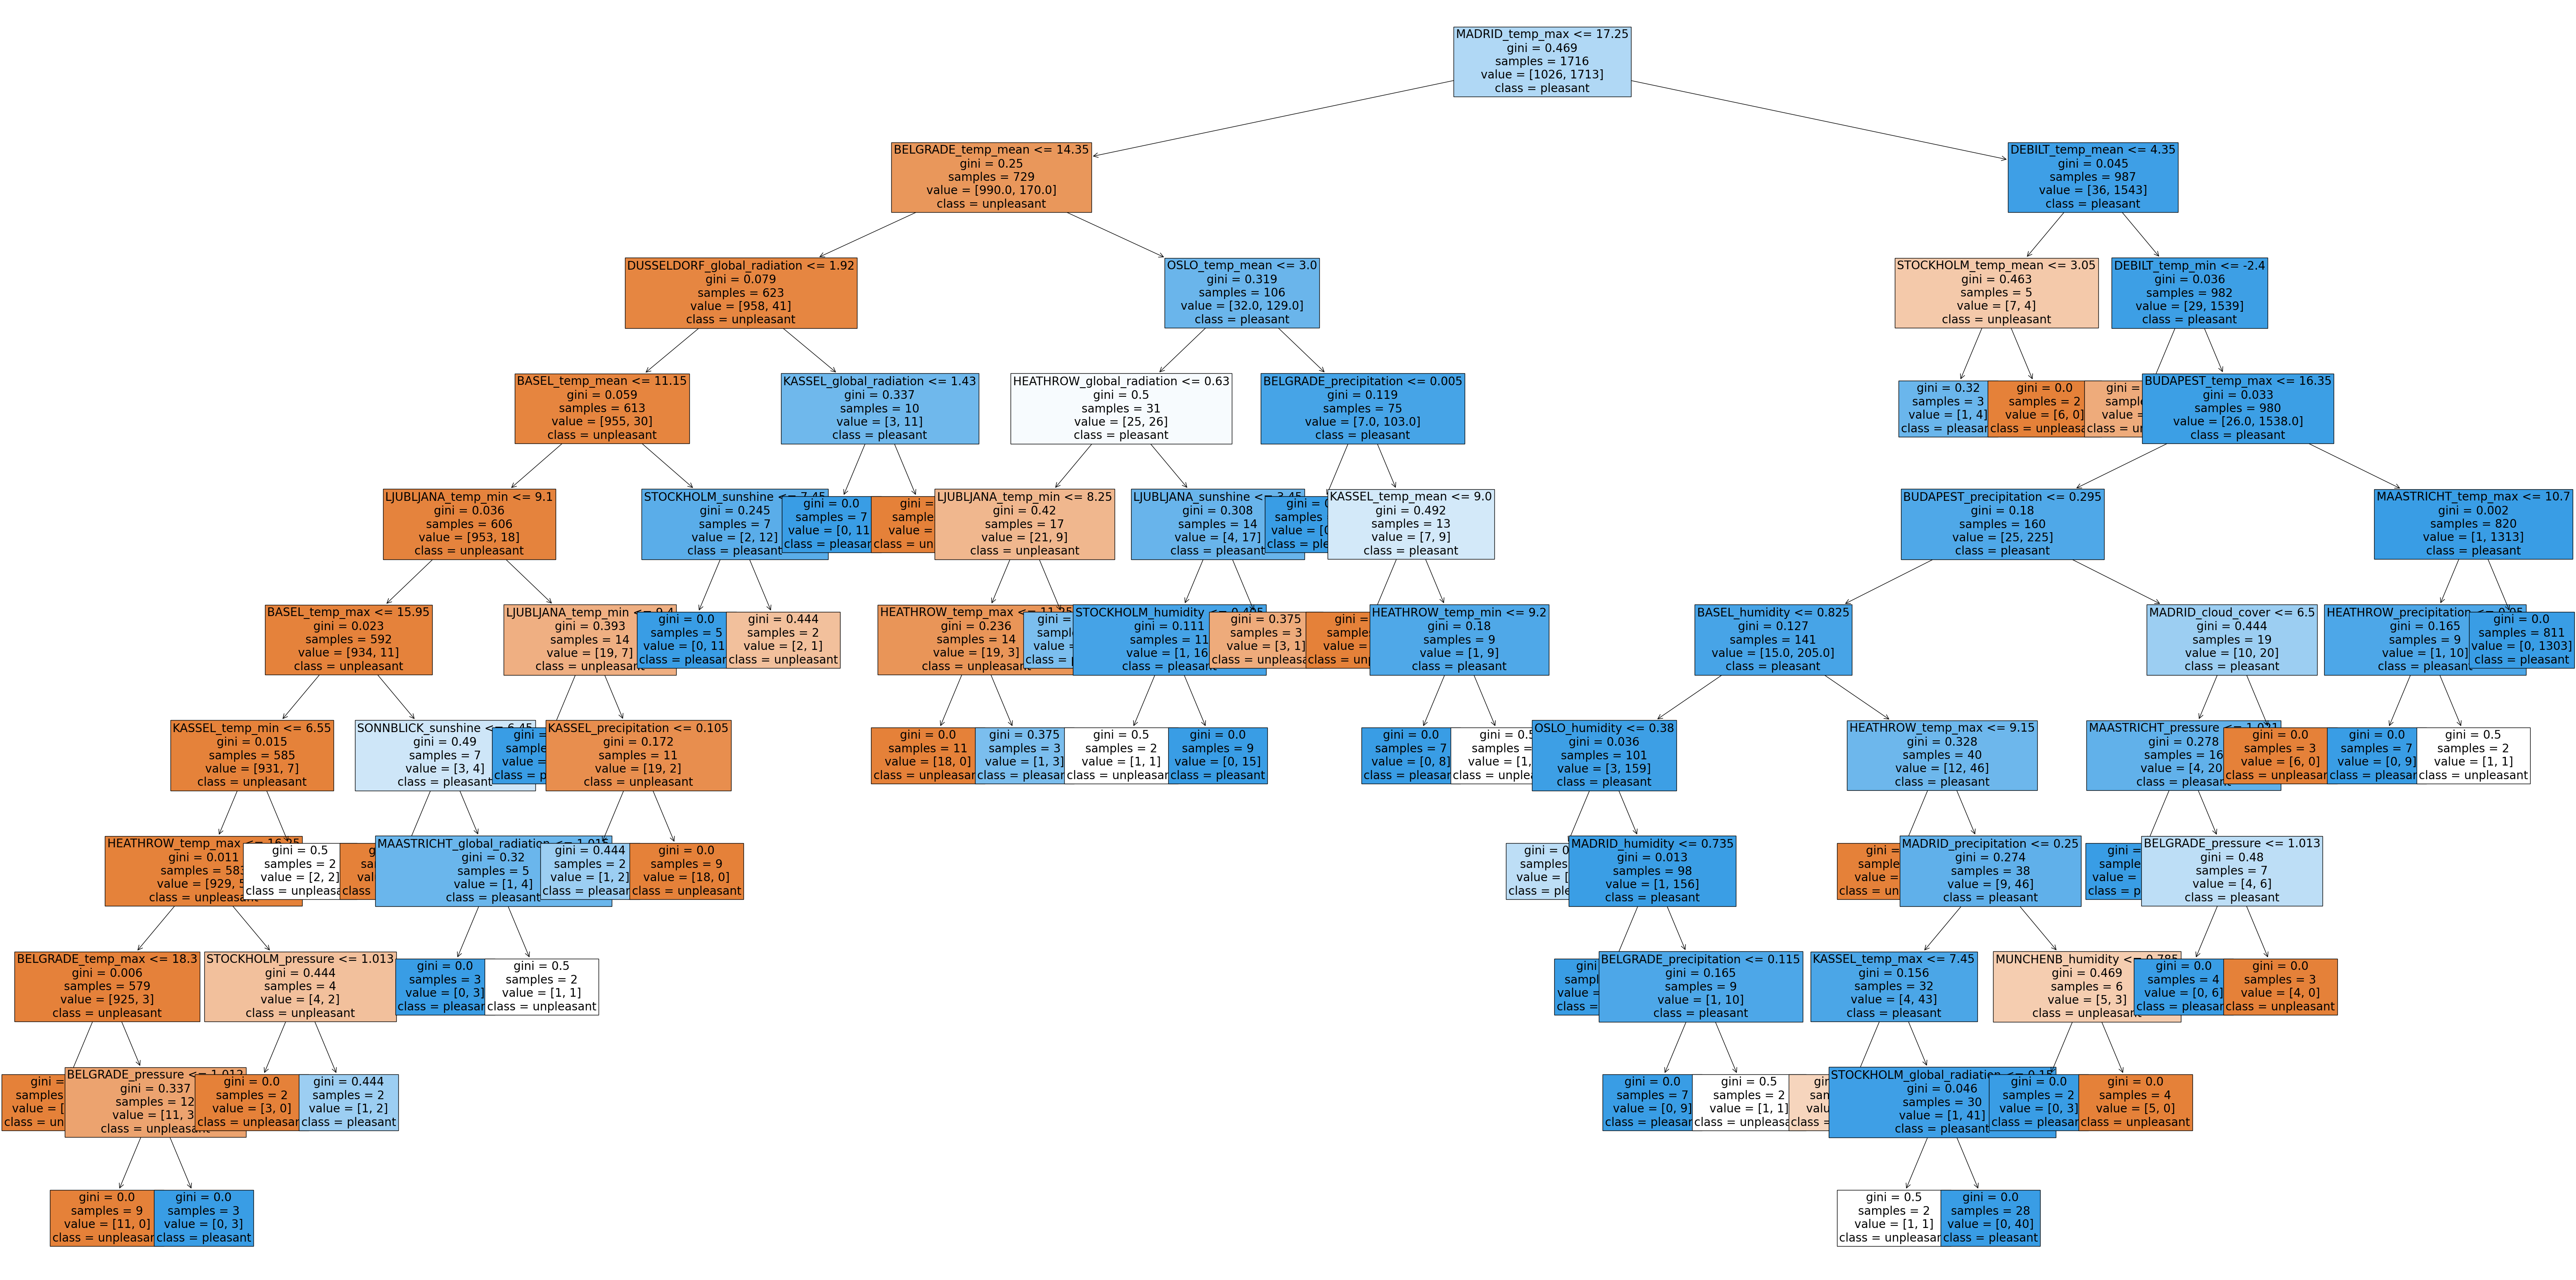

In [67]:
# Plot random forest (2010s)

rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1c.estimators_[5], fontsize = 20, feature_names=df_2010s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [68]:
# Save figure
rf_1.savefig(os.path.join(path, 'Visualization', 'rf_2010s_optimized.png'),bbox_inches='tight')

#### Feature Importance

In [70]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1c.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [2.82812546e-04 6.16886866e-04 1.17928687e-03 1.04064593e-03
 4.62583256e-04 5.44393641e-04 3.96711829e-02 1.79810660e-02
 3.03850820e-02 9.32212934e-04 1.54811584e-03 1.30117058e-03
 1.43331233e-03 4.26506369e-03 1.63054525e-03 1.52735539e-02
 2.18404434e-03 1.91748374e-02 6.74834464e-05 0.00000000e+00
 0.00000000e+00 4.33202158e-04 9.25358496e-04 3.10025010e-04
 4.59686847e-02 1.54815579e-03 7.49573051e-02 2.11505193e-04
 6.24667602e-04 8.94067968e-04 1.12479964e-03 5.48516853e-04
 4.34798861e-04 9.96458175e-03 1.42931465e-03 5.17991104e-02
 4.66849198e-04 4.96205269e-04 1.01411508e-03 5.62215106e-03
 3.93737206e-04 4.71910011e-04 1.09988881e-02 9.46471359e-04
 3.89191785e-02 3.50351319e-04 8.02870867e-04 1.05138151e-03
 2.20554006e-03 7.20668091e-04 1.21546893e-03 2.90243178e-03
 9.65403577e-04 4.77530164e-04 1.77391566e-02 2.25841990e-04
 3.40218685e-04 3.80757605e-04 2.44298360e-04 3.60887938e-04
 4.51633094e-04 2.93573604e-04 6.43406505e-04 4.11868238e-04
 1.

In [71]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [72]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.09216394 0.04774286 0.12421021 0.06703136 0.05932951 0.01069165
 0.02067977 0.16490764 0.03693716 0.26562195 0.04412803 0.02163642
 0.00792293 0.03462258 0.002374  ]


In [73]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [74]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [75]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.265622
7        LJUBLJANA    0.164908
2         BUDAPEST    0.124210
0            BASEL    0.092164
3           DEBILT    0.067031
4       DUSSELDORF    0.059330
1         BELGRADE    0.047743
10        MUNCHENB    0.044128
8       MAASTRICHT    0.036937
13       STOCKHOLM    0.034623
11            OSLO    0.021636
6           KASSEL    0.020680
5         HEATHROW    0.010692
12       SONNBLICK    0.007923
14        VALENTIA    0.002374


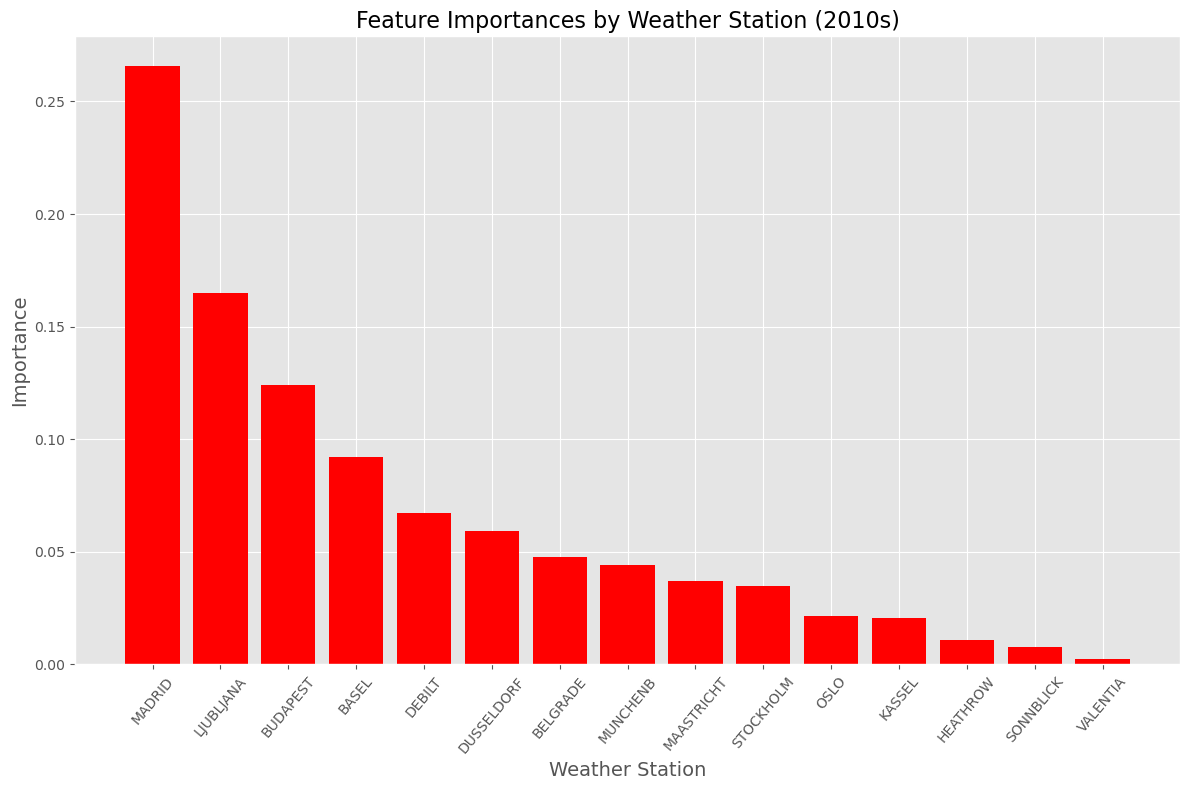

In [76]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='red')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

In [162]:
plt_1.savefig(os.path.join(path,'Visualization', 'Influence_2010s_optimized.png'))

#### Madrid

##### Random Forest

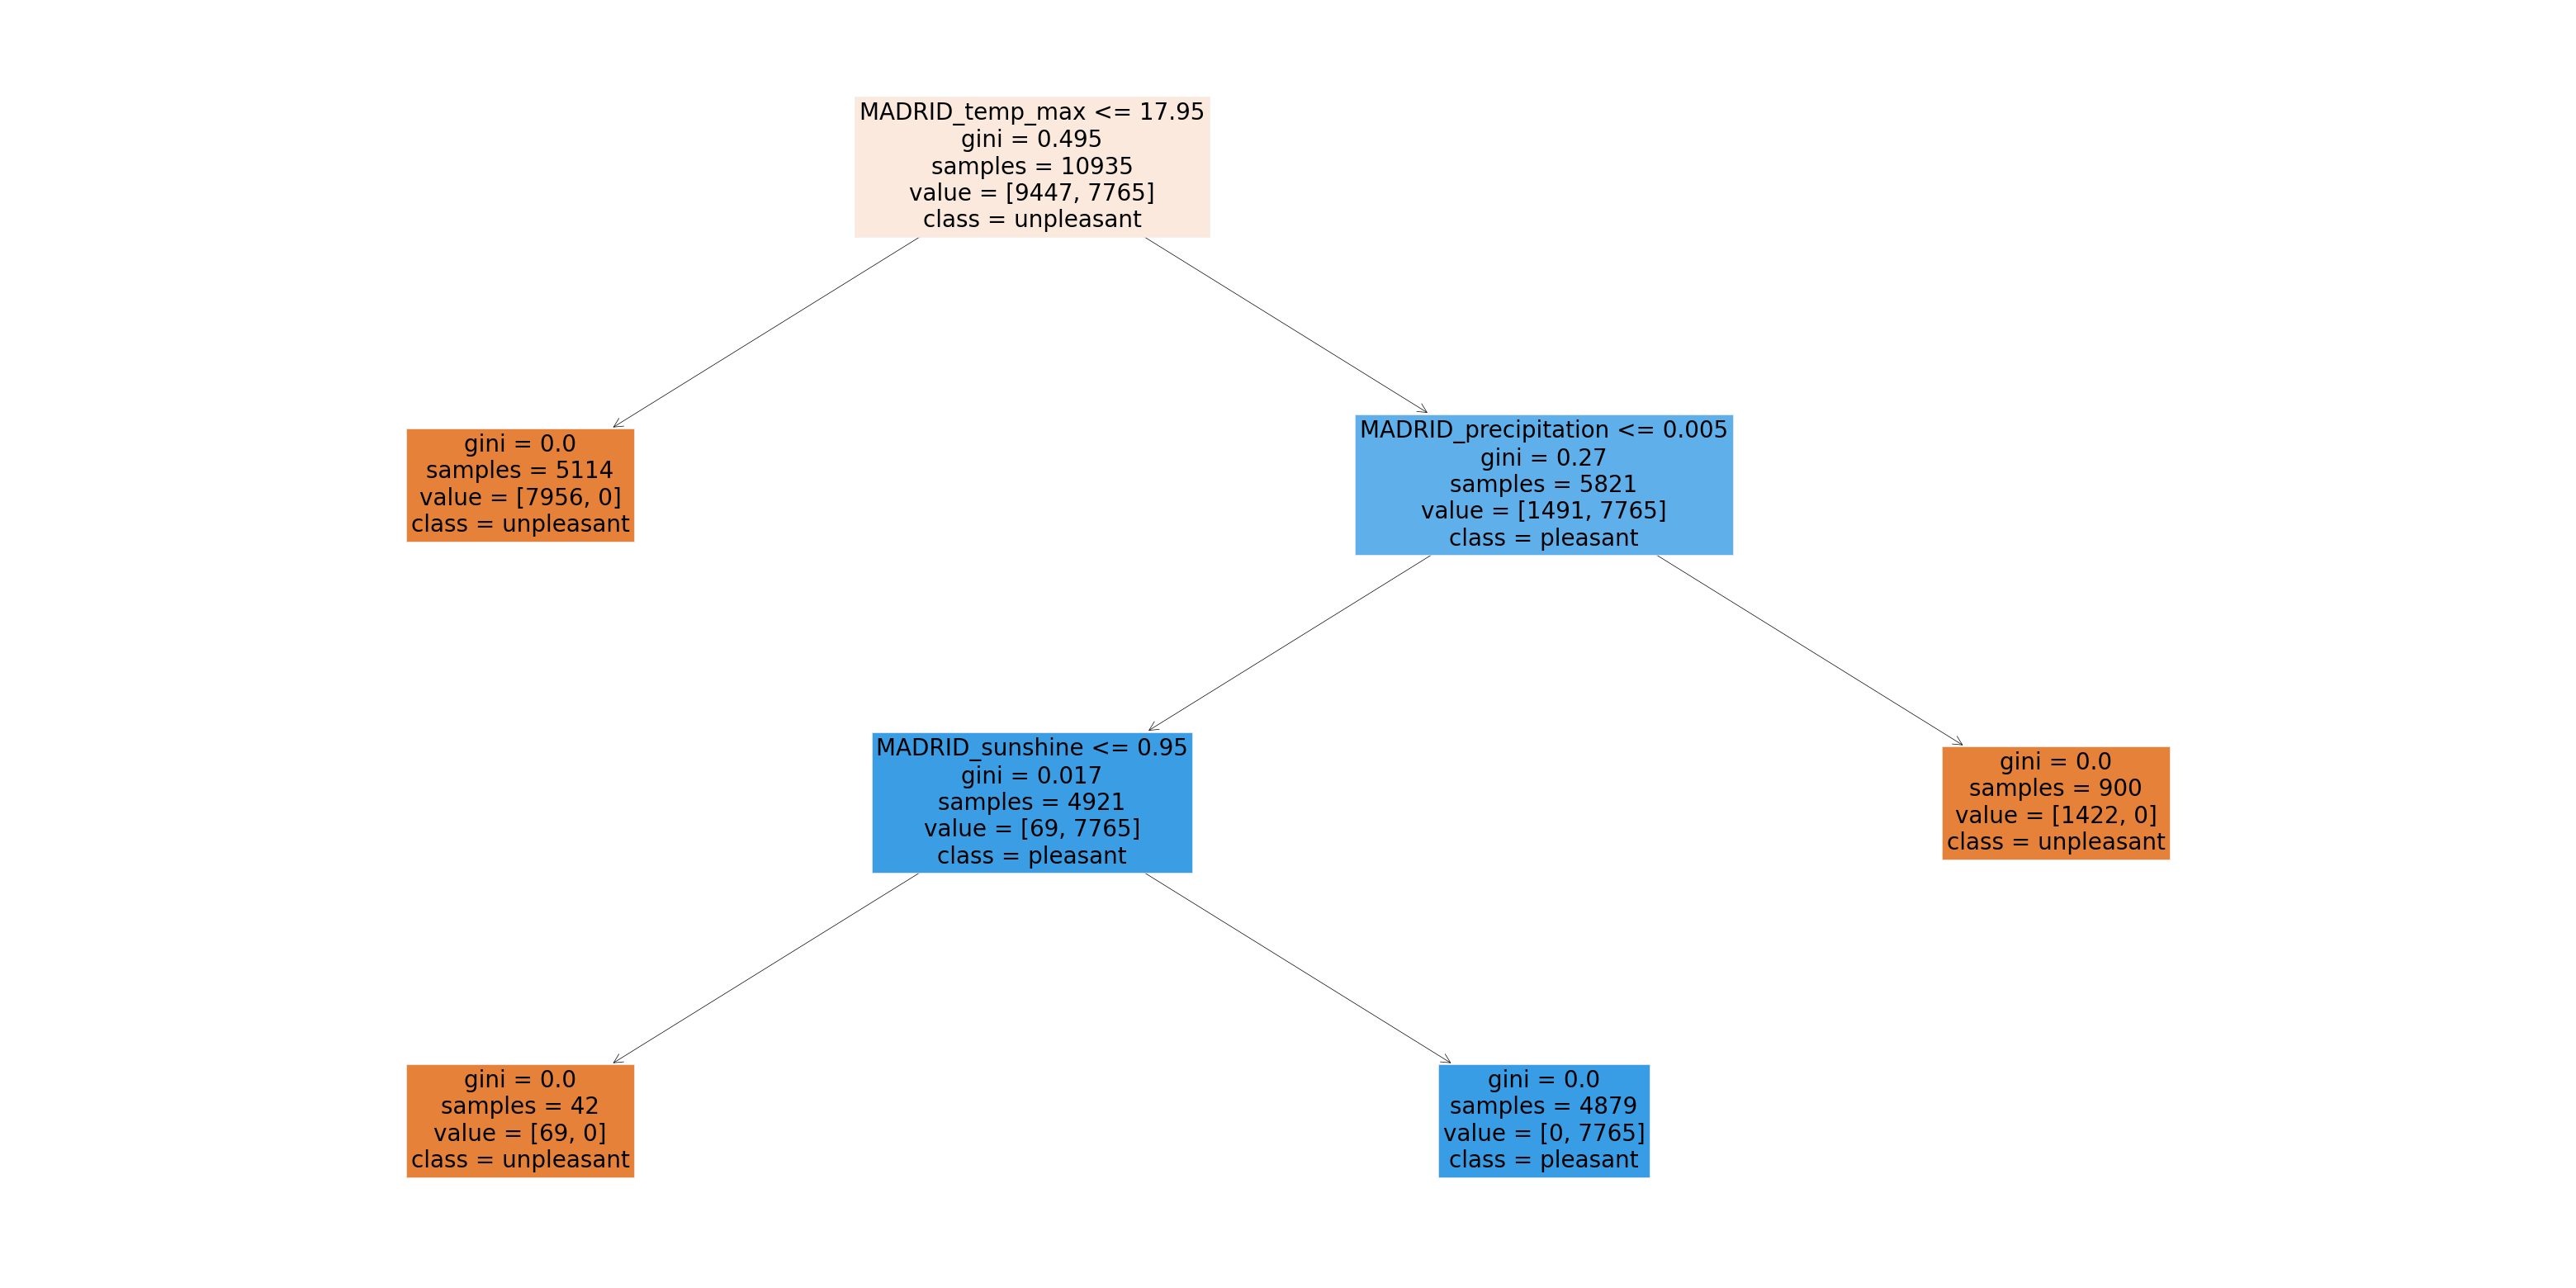

In [80]:
# Plot random forest (Madrid)
rf_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2c.estimators_[5], fontsize = 20, feature_names=df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [81]:
# Export the plot
rf_2.savefig(os.path.join(path, 'Visualization', 'rf_madrid_optimized.png'),bbox_inches='tight')

#### Feature Importance

In [83]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2c.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances: [0.00089716 0.         0.         0.         0.25968089 0.02094267
 0.06263235 0.         0.65584693]
(9,)


In [84]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [85]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_2
})

In [86]:
# Sort by importance for chart readability
importances_df_2 = importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_2)

Feature Importance:
        Measurement  Importance
8          temp_max    0.655847
4     precipitation    0.259681
6         temp_mean    0.062632
5          sunshine    0.020943
0       cloud_cover    0.000897
1          humidity    0.000000
2          pressure    0.000000
3  global_radiation    0.000000
7          temp_min    0.000000


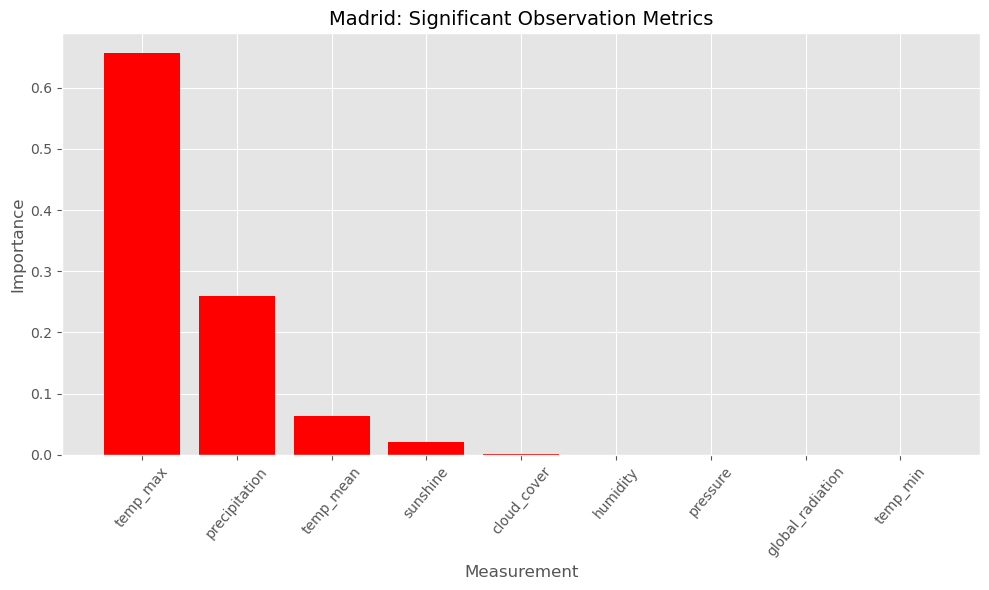

In [87]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_2['Measurement'], importances_df_2['Importance'], color='red')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

In [164]:
plt_2.savefig(os.path.join(path,'Visualization', 'Influence_madrid_optimized.png'))